# HCP MEG Power Spectra

Download the data (you need an account to do this)

In [3]:
!s3cmd get s3://hcp-openaccess/HCP_900/100307/MEG/Restin/powavg/100307_MEG_3-Restin_powavg.mat

s3://hcp-openaccess/HCP_900/100307/MEG/Restin/powavg/100307_MEG_3-Restin_powavg.mat -> ./100307_MEG_3-Restin_powavg.mat  [1 of 1]
 1668603 of 1668603   100% in    1s   954.58 kB/s  done


Importage

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


import nibabel as nib

Load the data

In [4]:
from scipy.io import loadmat

In [5]:
f = '100307_MEG_3-Restin_powavg.mat'

In [10]:
mat = loadmat(f,struct_as_record=False,squeeze_me=True)

In [11]:
mat['freq']

In [13]:
freqs = mat['freq']

In [27]:
df = pd.DataFrame(freqs.powspctrm,columns=freqs.freq,index=freqs.label).T

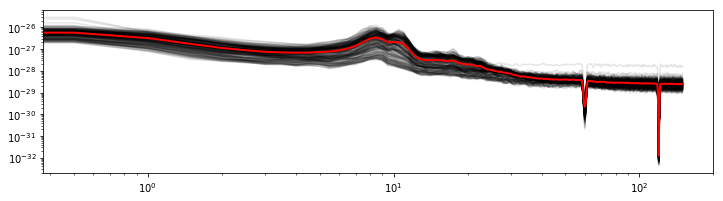

In [39]:
fig, ax = plt.subplots(figsize=(12,3))

df.plot(legend=False,ax=ax,c='k', alpha=0.1,logy=True,logx=True)
df.mean(axis=1).plot(ax=ax,c='r',logy=True,logx=True, linewidth=2.)

In [40]:
df.to_csv('HCP_100307_MEG_3-Restin_powavg_ps.csv')